In [1]:
#Importing the required libraries.
import os
import zipfile
import random
import tensorflow as tf
import shutil
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd

In [2]:
# Taking the zip file from local computer and unzipping it into the tmp folder.
# You can download the complete dataset of cats and dogs from the link below:
# https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
# You can also download data directly from the Kaggle website where it was originally released.
# https://www.kaggle.com/c/dogs-vs-cats/data

path_cats_and_dogs = r'C:\Users\death\Downloads\Data Analytics\Dataset\cats_and_dogs_filtered.zip'

local_zip = path_cats_and_dogs
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [3]:
os.listdir('/tmp/cats_and_dogs_filtered')

['train', 'validation', 'vectorize.py']

In [4]:
print(len(os.listdir('/tmp/cats_and_dogs_filtered/train/')))
print(len(os.listdir('/tmp/cats_and_dogs_filtered/validation/')))

2
2


In [20]:
train_cats_dir = os.listdir('/tmp/cats_and_dogs_filtered/train/cats')
train_dogs_dir = os.listdir('/tmp/cats_and_dogs_filtered/train/dogs')

In [21]:
print(train_cats_dir[:10])
print(train_dogs_dir[:10])

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.101.jpg', 'cat.102.jpg', 'cat.103.jpg', 'cat.104.jpg', 'cat.105.jpg', 'cat.106.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


In [11]:
# Defining a keras model to classify cats and dogs.
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])

C:\Users\death\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [12]:
# Creating a Training and Validation Generator.
TRAINING_DIR = '/tmp/cats_and_dogs_filtered/train/'
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                   target_size=(150,150),
                                                   batch_size=10,
                                                   class_mode='binary')

VALIDATION_DIR = '/tmp/cats_and_dogs_filtered/validation/'
validation_datagen = ImageDataGenerator(rescale=1./255)


validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                             target_size=(150,150),
                                                             batch_size=10,
                                                             class_mode='binary',
                                                             )


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [13]:
# Fitting the model.
history = model.fit_generator(train_generator,
                              epochs=2,
                              verbose=1,
                              validation_data=validation_generator)


C:\Users\death\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/2
200/200 [==============================] - 61s 299ms/step - loss: 0.7384 - acc: 0.5645 - val_loss: 0.6543 - val_acc: 0.5790
Epoch 2/2
200/200 [==============================] - 44s 220ms/step - loss: 0.6066 - acc: 0.6815 - val_loss: 0.5961 - val_acc: 0.7050


Text(0.5, 1.0, 'Training and validation loss')

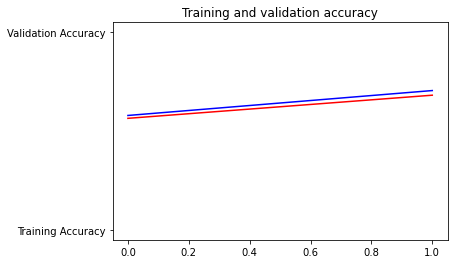

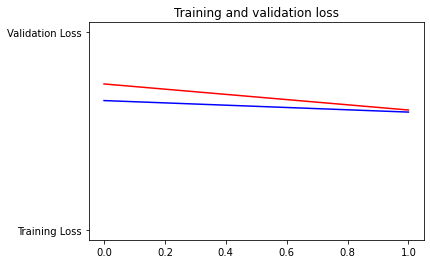

In [14]:
# Plotting loss and accuracy.
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')
